In [1]:
import numpy as np
import scipy.signal
from matplotlib.pyplot import *
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display
from filter_function import *
from spectrogram import *

import matplotlib.image as mpimg
import glob
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, UpSampling2D, Input,Dropout,Conv2DTranspose,Concatenate
from keras.layers import  Conv1D, MaxPooling1D, UpSampling1D,Concatenate, PReLU
from keras import optimizers

Using TensorFlow backend.


In [2]:
original_dataset_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\recordings\\"

base_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\super_resolution_re_im"
train_dir = os.path.join(base_dir, 'train\\')

test_dir = os.path.join(base_dir, 'test\\')
train_dir_filtré=os.path.join(base_dir, 'train_dir_filtré\\')
test_dir_filtré=os.path.join(base_dir, 'test_dir_filtré\\')

In [3]:
Xtest,Phase_test=dir_to_log_mel(test_dir)
Xtrain,Phase_train=dir_to_log_mel(train_dir)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\test\
processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\5_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\7_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\9_theo_16.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\9_theo_28.wav


In [133]:
fce=0.04535#sr=22050
ftype="butter"
ordre=4
b,a = creer_filter(fce,"lowpass",ftype,ordre)
filter_path(train_dir,train_dir_filtré,b,a)
filter_path(test_dir,test_dir_filtré,b,a)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\
processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\test\


In [134]:
print(Xtest.shape)

(200, 1024, 16, 1)


In [135]:

Xtrain_fil,Phase_train_fil=dir_to_log_mel(train_dir_filtré)
Xtest_fil,Phase_test_fil=dir_to_log_mel(test_dir_filtré)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\5_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\7_theo_36.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\9_theo_16.wav
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\9_theo_28.wav
processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\test_dir_filtré\


In [136]:
input_img = Input(shape=(1024, 16,1))

conv1= Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
max1= MaxPooling2D((2, 1), padding='same')(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(max1)
encoded = MaxPooling2D((2, 1), padding='same')(conv2)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 1))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((2, 1))(x)



decoded = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=optimizers.Adam(lr=0.0001), loss='mse')
#optimizer=optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False)
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 1024, 16, 1)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 1024, 16, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 512, 16, 32)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 512, 16, 32)       9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 256, 16, 32)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 256, 16, 32)       9248      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 256, 16, 32)       9248      
__________

In [137]:

autoencoder.fit(Xtrain_fil,Xtrain,epochs=20,
                batch_size=20,
                shuffle=True,
                validation_data=(Xtest_fil, Xtest))

Train on 1800 samples, validate on 200 samples
Epoch 1/20
1800/1800 [==============================] - 13s 7ms/step - loss: 0.0219 - val_loss: 0.0118
Epoch 2/20
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0116 - val_loss: 0.0099
Epoch 3/20
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 4/20
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0098 - val_loss: 0.0087
Epoch 5/20
1800/1800 [==============================] - 12s 7ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 6/20
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 7/20
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0078 - val_loss: 0.0064
Epoch 8/20
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0066 - val_loss: 0.0053
Epoch 9/20
1800/1800 [==============================] - 12s 6ms/step - loss: 0.0056 - val_loss: 0.0046
Epoch 10/20
1800/1800 [===

In [138]:
decoded = autoencoder.predict(Xtest_fil)

In [139]:
p=0
#indice to display
Spec=np.reshape(Xtest[p],(Xtest.shape[1],Xtest.shape[2]))
Spec_fil=np.reshape(Xtest_fil[p],(Xtest_fil.shape[1],Xtest_fil.shape[2]))
Spec_dec=np.reshape(decoded[p],(decoded.shape[1],decoded.shape[2]))
print(Spec.shape)

(1024, 16)


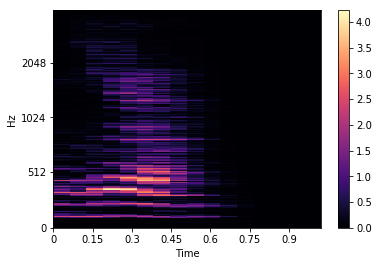

In [140]:

librosa.display.specshow(Spec, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()

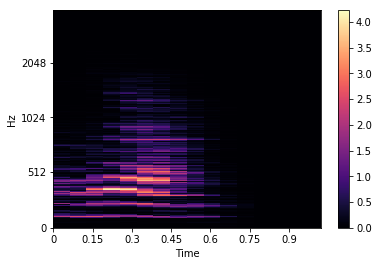

In [141]:
librosa.display.specshow(Spec_fil, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()

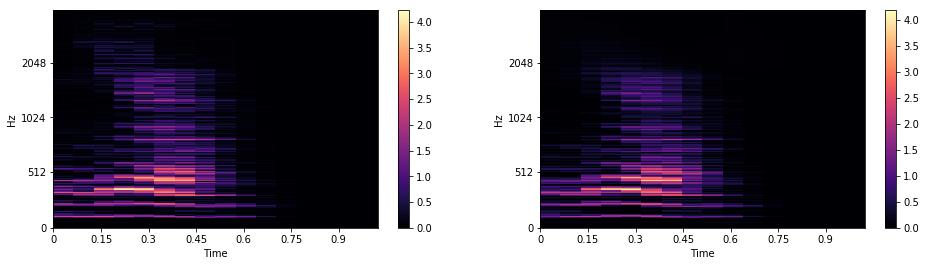

In [142]:
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
librosa.display.specshow(Spec, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()
plt.subplot(1,2,2)
librosa.display.specshow(Spec_dec, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()

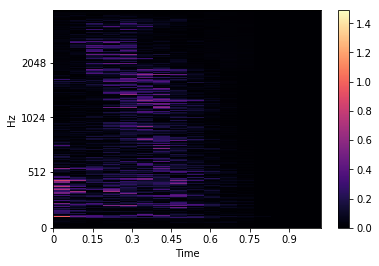

In [143]:
Delta=abs(Spec_dec-Spec)
librosa.display.specshow(Delta, sr=8000, x_axis='time', y_axis='mel',fmax=4000)
colorbar()

In [144]:
import sklearn
error=sklearn.metrics.mean_squared_error(Spec,Spec_dec)
print(error)

0.014772171404417566


In [145]:
print(Phase_test.shape)

(200, 1024, 16)


In [146]:
Lin_test=mel_to_linspec(Xtest,sr=8000,n_mels=1024,n_fft=2048)
Lin_dec=mel_to_linspec(decoded,sr=8000,n_mels=1024,n_fft=2048)
Lin_test_fil=mel_to_linspec(Xtest_fil,sr=8000,n_mels=1024,n_fft=2048)

In [160]:
sr=8000
G=40
xtest=librosa.istft(Lin_test[p] * Phase_test[p]*G)
audio_path_record="C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\"
audio_path_record_in=os.path.join(audio_path_record,"0_jackson_0_normal.wav")
soundfile.write(audio_path_record_in,xtest,sr)
ipd.Audio(audio_path_record_in)

In [166]:
Phase_cutted=np.ones((1024,16),dtype=complex)
for i in range(436):
    for j in range(16):
        Phase_cutted[i][j]=Phase_test[p][i][j]
        j=j+1
    i=i+1
y=librosa.istft(Lin_dec[p] * Phase_cutted*G)
audio_path_record_out=os.path.join(audio_path_record,"0_jackson_0_reconstructed.wav")
soundfile.write(audio_path_record_out,y,sr)
ipd.Audio(audio_path_record_out)


In [162]:
xtest_fil=librosa.istft(Lin_test_fil[p] * Phase_test_fil[p]*G)
audio_path_record_in_fil=os.path.join(audio_path_record,"0_jackson_0_filtered.wav")
soundfile.write(audio_path_record_in_fil,xtest_fil,sr)
ipd.Audio(audio_path_record_in_fil)

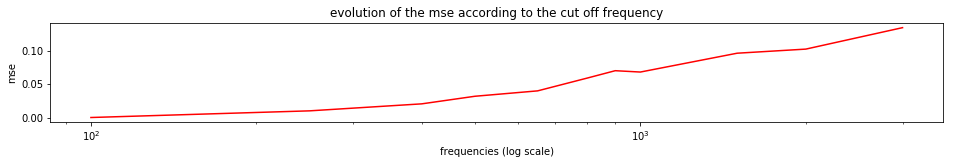

In [150]:
fc=[100,250,400,500,650,800,900,1000,1500,2000,3000]
mse0=[4*(10e-5),0.0103,0.0207,0.0320,0.04,0.059,0.07,0.068,0.096,0.1021,0.134]

fig=plt.figure(figsize=(16, 4))
ax=fig.add_subplot(2,1,1)
plt.plot(fc,mse0,"r",label="p=0")

ax.set_xscale('log')
plt.xlabel("frequencies (log scale)")
plt.ylabel('mse')
title("evolution of the mse according to the cut off frequency" )
plt.show()

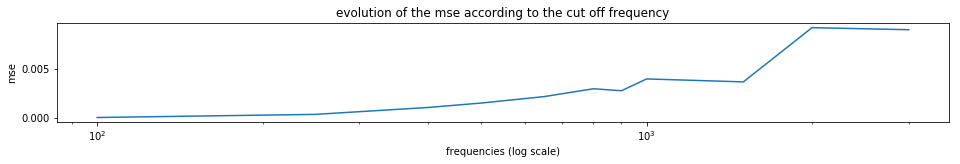

In [151]:

mse16=[8*10e-6,4*10e-5,0.0011,0.00155,0.0022,0.003,0.0028,0.004,0.0037,0.00921,0.009]
fig=plt.figure(figsize=(16, 4))
ax=fig.add_subplot(2,1,1)

plt.plot(fc,mse16,label="p=16")
ax.set_xscale('log')
plt.xlabel("frequencies (log scale)")
plt.ylabel('mse')
title("evolution of the mse according to the cut off frequency" )
plt.show()

In [152]:
mel_freq=librosa.core.mel_frequencies(n_mels=1024, fmin=0.0, fmax=4000)

In [158]:
print(mel_freq[436])

999.1136850552531
